Loaded 1440 images from 20 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │         2,580 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,627,156 (6.21 MB)

 Trainable params: 1,627,156 (6.21 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 294ms/step - accuracy: 0.1600 - loss: 2.7742 - val_accuracy: 0.8276 - val_loss: 1.0600
Epoch 2/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 172ms/step - accuracy: 0.7014 - loss: 1.0594 - val_accuracy: 0.9397 - val_loss: 0.2138
Epoch 3/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 178ms/step - accuracy: 0.8943 - loss: 0.3896 - val_accuracy: 0.9828 - val_loss: 0.0939
Epoch 4/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 201ms/step - accuracy: 0.9439 - loss: 0.1838 - val_accuracy: 0.9914 - val_loss: 0.0351
Epoch 5/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 181ms/step - accuracy: 0.9570 - loss: 0.1315 - val_accuracy: 1.0000 - val_loss: 0.0120
Epoch 6/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 171ms/step - accuracy: 0.9729 - loss: 0.0934 - val_accuracy: 1.0000 - val_loss: 0.0067
Epoch 7/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 212ms/step - accuracy: 0.9700 - loss: 0.0744 - val_accuracy: 1.0000 - val_loss: 0.0128
Epoch 8/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 164ms/step - accuracy: 0.9766 - loss: 0.0655 - val_accuracy

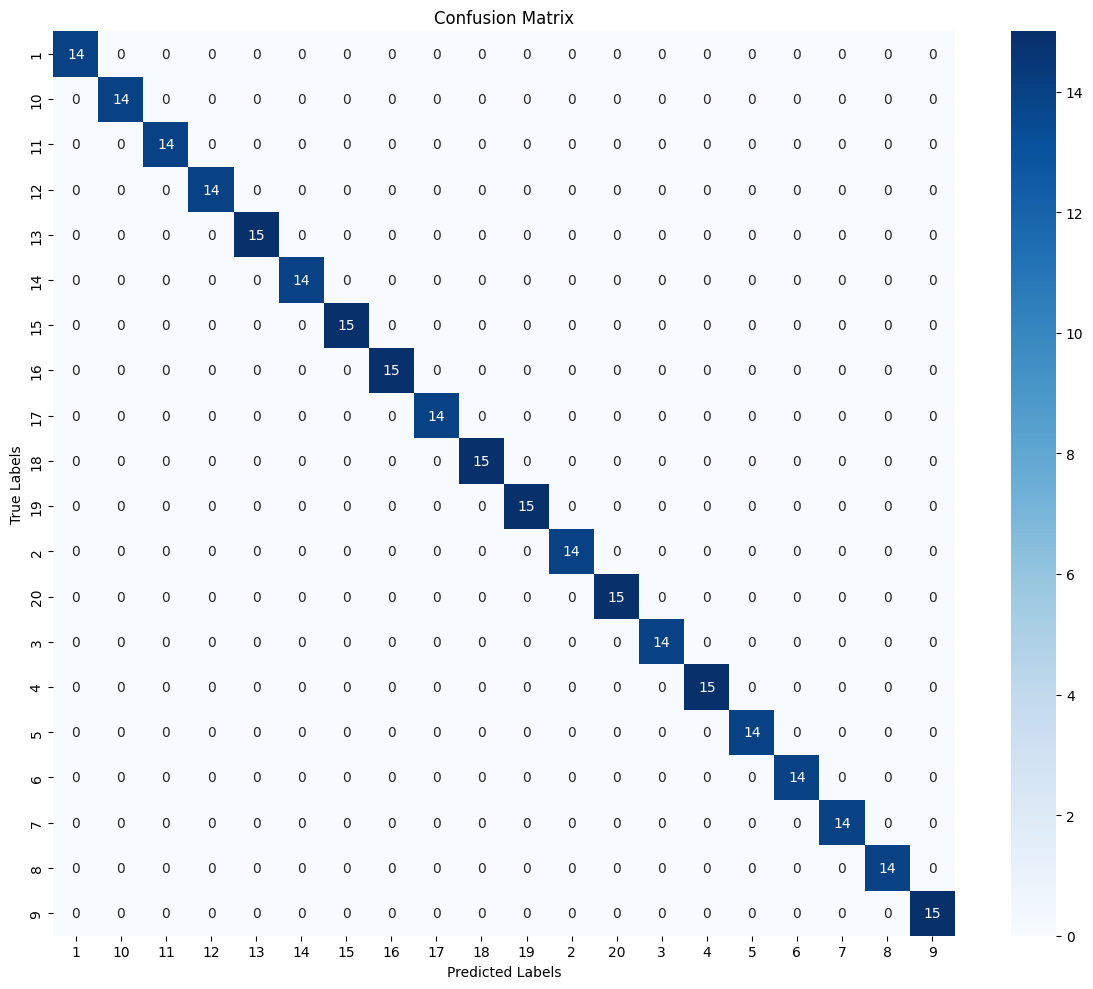

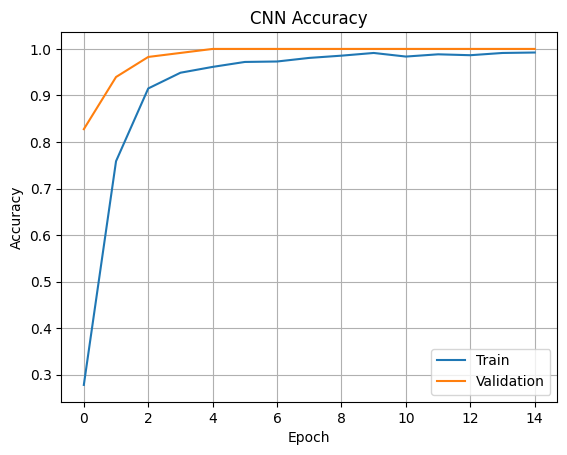

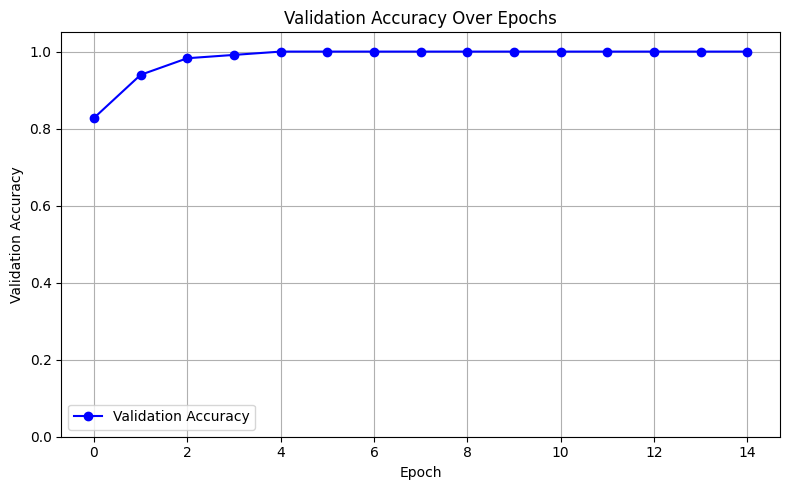

In [ ]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# 1. Unzip the dataset
zip_path = "/content/coil-20.zip"
extract_dir = "coil-20"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# 2. Load images and labels
data_dir = os.path.join(extract_dir, "coil-20")  # Adjusted path to the actual images

images, labels = [], []

for class_folder in sorted(os.listdir(data_dir)):
    class_path = os.path.join(data_dir, class_folder)
    if os.path.isdir(class_path):
        for filename in os.listdir(class_path):
            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.pgm')):
                try:
                    img_path = os.path.join(class_path, filename)
                    img = Image.open(img_path).convert("L")  # Grayscale
                    img = img.resize((64, 64))
                    images.append(np.array(img))
                    labels.append(class_folder)
                except Exception as e:
                    print(f"Skipped {filename}: {e}")

print(f"Loaded {len(images)} images from {len(set(labels))} classes.")

# 3. Prepare data
X = np.array(images).reshape(-1, 64, 64, 1).astype("float32") / 255.0
y = np.array(labels)

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# One-hot encoding
num_classes = len(np.unique(y_encoded))
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# 4. Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# 5. Train the model
history = model.fit(X_train, y_train_cat, epochs=15, batch_size=32, validation_split=0.1, verbose=1)

# 6. Evaluate
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

# 7. Classification report
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_labels, target_names=le.classes_))

# 8. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_labels)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()

# 9. Plot training history
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("CNN Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Plot only validation accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['val_accuracy'], marker='o', color='blue', label='Validation Accuracy')
plt.title("Validation Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


✅ Loaded 1440 images from 20 classes.
🔍 Shape of image 1 from class '1': (64, 64)
🔍 Shape of image 2 from class '10': (64, 64)
🔍 Shape of image 3 from class '11': (64, 64)


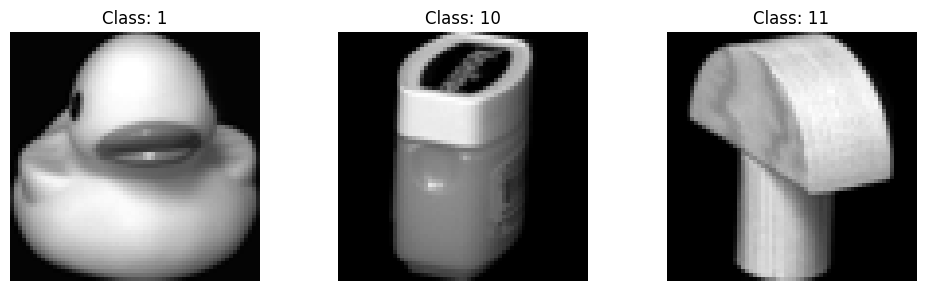

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 20)             │         2,580 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,627,156 (6.21 MB)

 Trainable params: 1,627,156 (6.21 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 174ms/step - accuracy: 0.2024 - loss: 2.6819 - val_accuracy: 0.8103 - val_loss: 0.9641
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 204ms/step - accuracy: 0.7246 - loss: 0.9300 - val_accuracy: 0.9655 - val_loss: 0.2388
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 201ms/step - accuracy: 0.8879 - loss: 0.3879 - val_accuracy: 0.9828 - val_loss: 0.0777
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 168ms/step - accuracy: 0.9477 - loss: 0.1673 - val_accuracy: 1.0000 - val_loss: 0.0318
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 167ms/step - accuracy: 0.9651 - loss: 0.1186 - val_accuracy: 1.0000 - val_loss: 0.0142
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 159ms/step - accuracy: 0.9865 - loss: 0.0711 - val_accuracy: 1.0000 - val_loss: 0.0075
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 195ms/step - accuracy: 0.9750 - loss: 0.0671 - val_accuracy: 1.0000 - val_loss: 0.0045
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 184ms/step - accuracy: 0.9794 - loss: 0.0718 - val_accurac

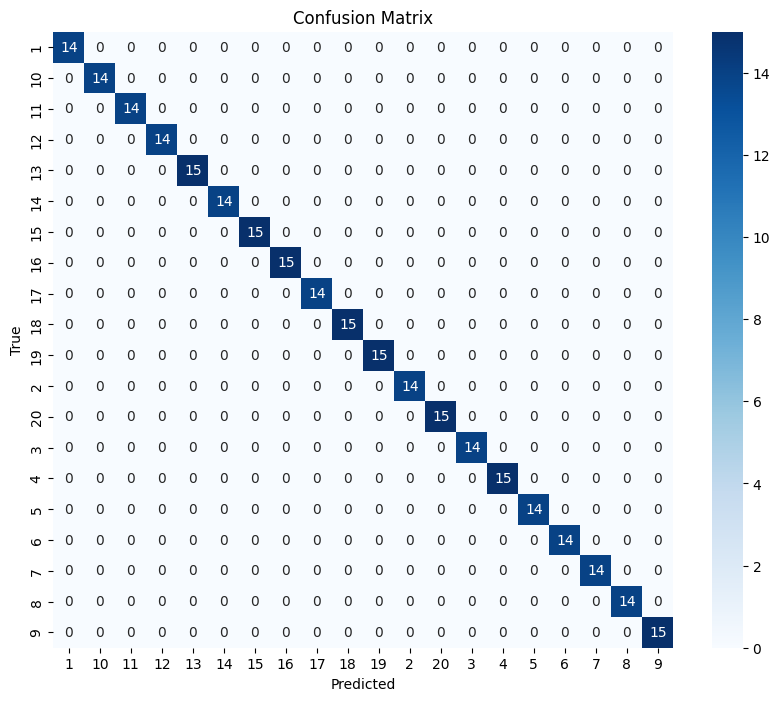

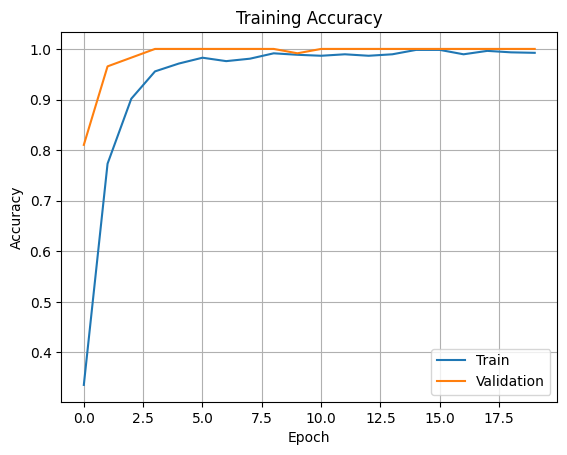

💾 Model saved as 'coil20_cnn_model.h5'


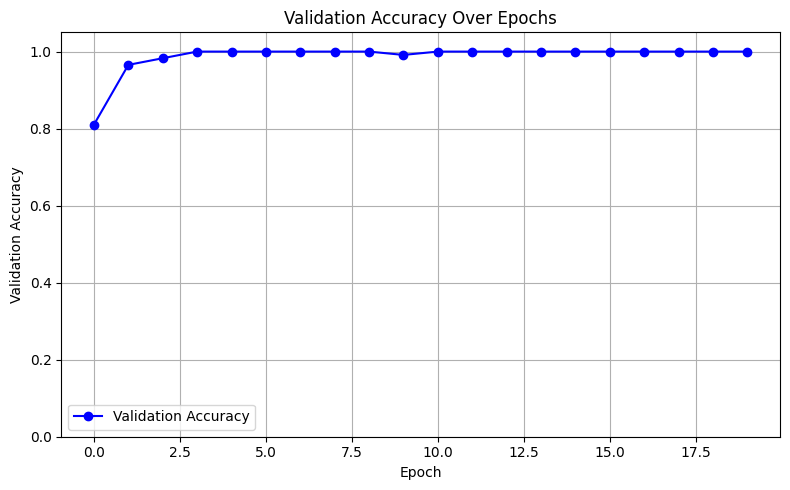

In [ ]:
# =========================
# 0. Imports & Setup
# =========================
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# =========================
# 1. Unzip Dataset
# =========================
zip_path = "/content/coil-20.zip"
extract_dir = "coil-20"

if not os.path.exists(extract_dir):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)

# =========================
# 2. Load and Preprocess Images
# =========================
data_dir = os.path.join(extract_dir, "coil-20")
images, labels = [], []

# Load and preprocess images
for class_folder in sorted(os.listdir(data_dir)):
    class_path = os.path.join(data_dir, class_folder)
    if os.path.isdir(class_path):
        for filename in os.listdir(class_path):
            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.pgm')):
                try:
                    img_path = os.path.join(class_path, filename)
                    img = Image.open(img_path).convert("L")  # Convert to grayscale
                    img = img.resize((64, 64))  # Resize to 64x64
                    images.append(np.array(img))
                    labels.append(class_folder)
                except Exception as e:
                    print(f"⚠️ Skipped {filename}: {e}")

print(f"✅ Loaded {len(images)} images from {len(set(labels))} classes.")

# Select 3 different object indices
unique_classes = sorted(list(set(labels)))
selected_images = []
selected_labels = []

for cls in unique_classes[:3]:  # Select first 3 different classes
    for idx, label in enumerate(labels):
        if label == cls:
            selected_images.append(images[idx])
            selected_labels.append(label)
            break  # Take one sample per class

# Plot the selected images
plt.figure(figsize=(10, 3))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(selected_images[i], cmap='gray')
    plt.title(f'Class: {selected_labels[i]}')
    plt.axis('off')
    print(f"🔍 Shape of image {i+1} from class '{selected_labels[i]}': {selected_images[i].shape}")

plt.tight_layout()
plt.show()

# =========================
# 3. Encode and Split Data
# =========================
X = np.array(images).reshape(-1, 64, 64, 1).astype("float32") / 255.0
y = np.array(labels)

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

num_classes = len(np.unique(y_encoded))
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# =========================
# 4. Build CNN Model
# =========================
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# =========================
# 5. Train Model
# =========================
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    X_train, y_train_cat,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)

# =========================
# 6. Evaluate & Report
# =========================
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"\n✅ Test Accuracy: {test_accuracy:.2f}")

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

print("\n🧾 Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# =========================
# 7. Confusion Matrix
# =========================
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# =========================
# 8. Training History Plot
# =========================
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# =========================
# 9. (Optional) Save Model
# =========================
model.save("coil20_cnn_model.h5")
print("💾 Model saved as 'coil20_cnn_model.h5'")


# Plot only validation accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['val_accuracy'], marker='o', color='blue', label='Validation Accuracy')
plt.title("Validation Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

✅ Loaded 1440 images from 20 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 20)             │         2,580 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,627,156 (6.21 MB)

 Trainable params: 1,627,156 (6.21 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 229ms/step - accuracy: 0.0959 - loss: 2.8757 - val_accuracy: 0.5104 - val_loss: 1.7443
Epoch 2/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 187ms/step - accuracy: 0.3177 - loss: 2.1581 - val_accuracy: 0.6528 - val_loss: 1.1082
Epoch 3/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 227ms/step - accuracy: 0.4933 - loss: 1.5410 - val_accuracy: 0.8229 - val_loss: 0.6007
Epoch 4/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 185ms/step - accuracy: 0.6241 - loss: 1.1605 - val_accuracy: 0.9201 - val_loss: 0.3570
Epoch 5/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 224ms/step - accuracy: 0.6692 - loss: 1.0038 - val_accuracy: 0.9062 - val_loss: 0.3125
Epoch 6/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 188ms/step - accuracy: 0.7243 - loss: 0.8460 - val_accuracy: 0.9375 - val_loss: 0.2105
Epoch 7/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 188ms/step - accuracy: 0.7496 - loss: 0.7437 - val_accuracy: 0.9375 - val_loss: 0.2086
Epoch 8/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 226ms/step - accuracy: 0.7912 - loss: 0.6076 - val_accuracy: 

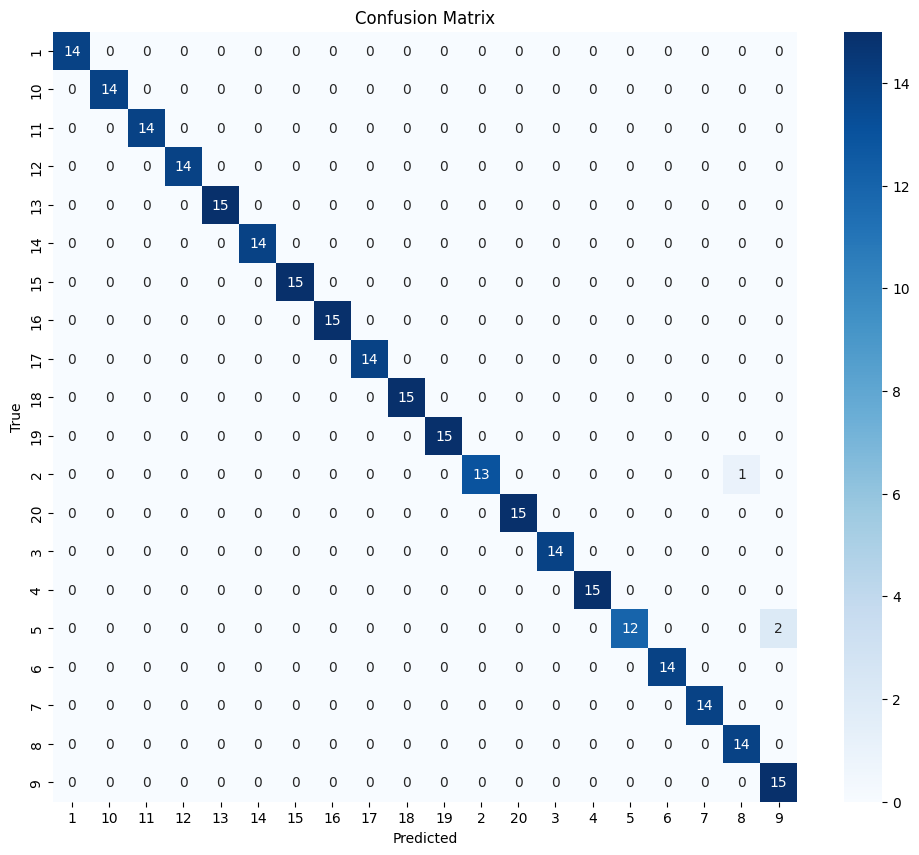

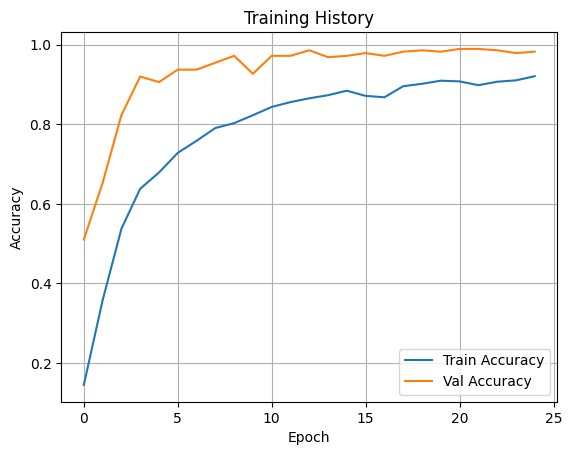

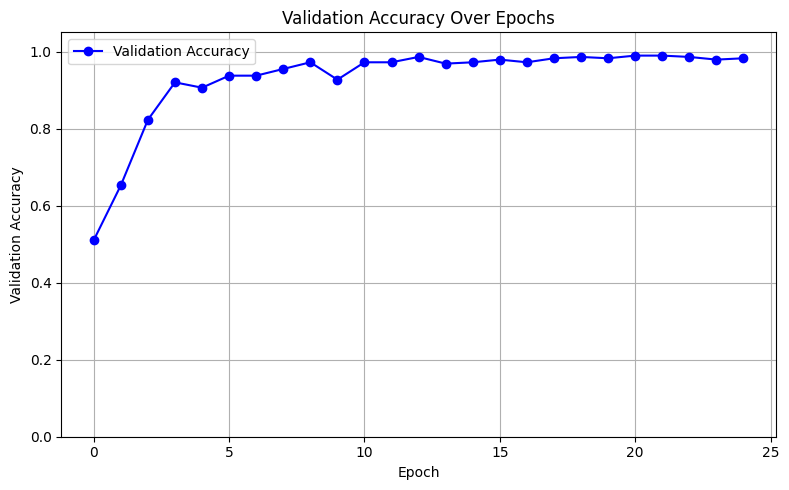

In [ ]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# 1. Unzip dataset
zip_path = "/content/coil-20.zip"
extract_dir = "coil-20"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# 2. Load images and labels
data_dir = os.path.join(extract_dir, "coil-20")
images, labels = [], []

for class_folder in sorted(os.listdir(data_dir)):
    class_path = os.path.join(data_dir, class_folder)
    if os.path.isdir(class_path):
        for filename in os.listdir(class_path):
            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.pgm')):
                try:
                    img_path = os.path.join(class_path, filename)
                    img = Image.open(img_path).convert("L")
                    img = img.resize((64, 64))
                    images.append(np.array(img))
                    labels.append(class_folder)
                except Exception as e:
                    print(f"Skipped {filename}: {e}")

print(f"✅ Loaded {len(images)} images from {len(set(labels))} classes.")

# 3. Preprocess data
X = np.array(images).reshape(-1, 64, 64, 1).astype("float32") / 255.0
y = np.array(labels)

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# One-hot encode labels
num_classes = len(np.unique(y_encoded))
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# 4. Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
datagen.fit(X_train)

# 5. Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# 6. Train with early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    datagen.flow(X_train, y_train_cat, batch_size=32),
    # Removed validation_split as it's not compatible with generator input
    epochs=30,
    callbacks=[early_stop],
    verbose=1,
    # Provided validation data using the pre-split test set
    validation_data=(X_test, y_test_cat)
)

# 7. Evaluate
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"\n✅ Test Accuracy: {test_accuracy:.4f}")

# 8. Classification Report
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_labels, target_names=le.classes_))

# 9. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_labels)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# 10. Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Training History")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()



# Plot only validation accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['val_accuracy'], marker='o', color='blue', label='Validation Accuracy')
plt.title("Validation Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Loaded 1440 images from 20 classes.
Epoch 1, Train Acc: 0.1172, Val Acc: 0.3750, Val Loss: 2.2016
Epoch 2, Train Acc: 0.3247, Val Acc: 0.6736, Val Loss: 1.2178
Epoch 3, Train Acc: 0.4922, Val Acc: 0.8472, Val Loss: 0.7374
Epoch 4, Train Acc: 0.5903, Val Acc: 0.9097, Val Loss: 0.4522
Epoch 5, Train Acc: 0.6944, Val Acc: 0.9062, Val Loss: 0.3620
Epoch 6, Train Acc: 0.7413, Val Acc: 0.9340, Val Loss: 0.2923
Epoch 7, Train Acc: 0.7691, Val Acc: 0.9306, Val Loss: 0.2359
Epoch 8, Train Acc: 0.7934, Val Acc: 0.9826, Val Loss: 0.1492
Epoch 9, Train Acc: 0.8342, Val Acc: 0.9826, Val Loss: 0.1352
Epoch 10, Train Acc: 0.8351, Val Acc: 0.9965, Val Loss: 0.0954
Epoch 11, Train Acc: 0.8420, Val Acc: 0.9757, Val Loss: 0.1048
Epoch 12, Train Acc: 0.8550, Val Acc: 0.9896, Val Loss: 0.0837
Epoch 13, Train Acc: 0.8602, Val Acc: 0.9965, Val Loss: 0.0680
Epoch 14, Train Acc: 0.8741, Val Acc: 0.9931, Val Loss: 0.0598
Epoch 15, Train Acc: 0.8759, Val Acc: 0.9965, Val Loss: 0.0540
Epoch 16, Train Acc: 0.8863,

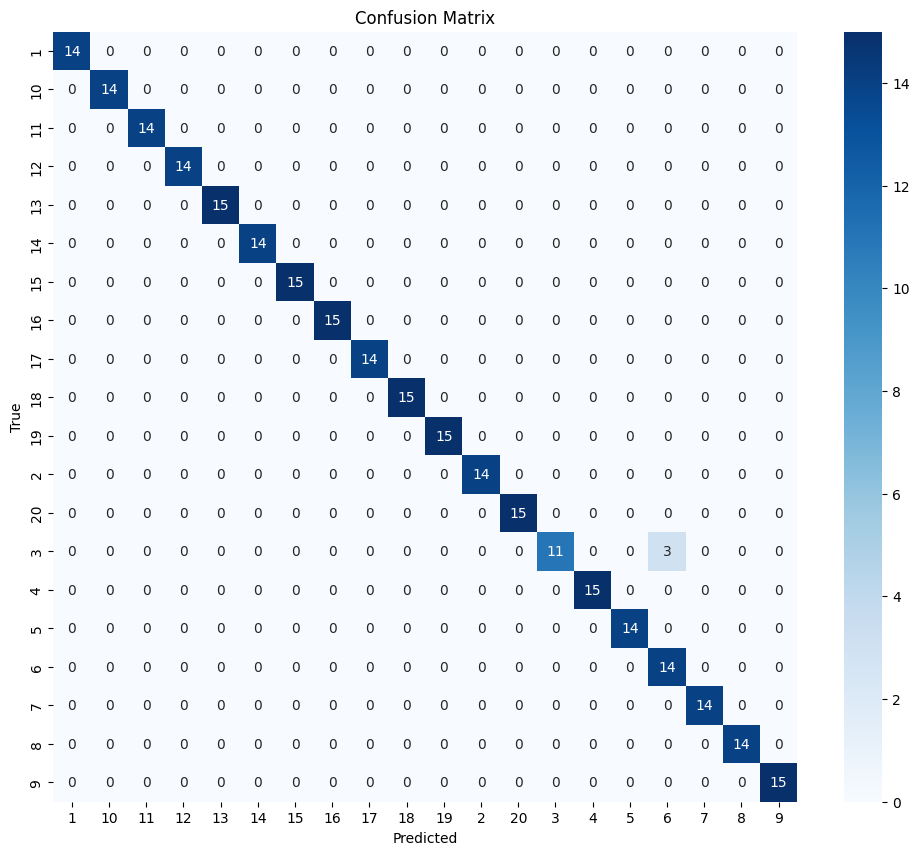

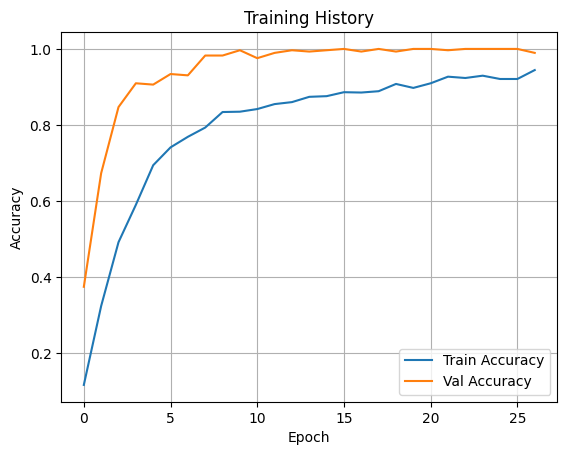

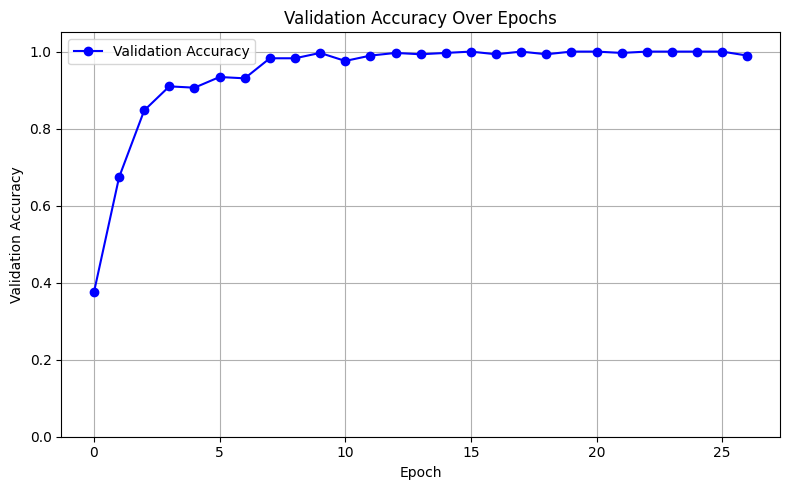

In [ ]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

# 1. Unzip dataset
zip_path = "/content/coil-20.zip"
extract_dir = "coil-20"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# 2. Load images and labels
data_dir = os.path.join(extract_dir, "coil-20")
images, labels = [], []

for class_folder in sorted(os.listdir(data_dir)):
    class_path = os.path.join(data_dir, class_folder)
    if os.path.isdir(class_path):
        for filename in os.listdir(class_path):
            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.pgm')):
                try:
                    img_path = os.path.join(class_path, filename)
                    img = Image.open(img_path).convert("L")
                    img = img.resize((64, 64))
                    images.append(np.array(img))
                    labels.append(class_folder)
                except Exception as e:
                    print(f"Skipped {filename}: {e}")

print(f"Loaded {len(images)} images from {len(set(labels))} classes.")

# 3. Preprocess
X = np.array(images).reshape(-1, 64, 64).astype("float32") / 255.0
y = np.array(labels)

le = LabelEncoder()
y_encoded = le.fit_transform(y)
num_classes = len(np.unique(y_encoded))

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# 4. PyTorch Dataset
class Coil20Dataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]
        image = Image.fromarray((image * 255).astype(np.uint8))
        if self.transform:
            image = self.transform(image)
        return image, label

# Transforms (data augmentation)
train_transform = transforms.Compose([
    transforms.RandomRotation(20),
    transforms.RandomAffine(0, translate=(0.1, 0.1), scale=(0.9, 1.1)),
    transforms.ToTensor()
])
test_transform = transforms.ToTensor()

train_dataset = Coil20Dataset(X_train, y_train, transform=train_transform)
test_dataset = Coil20Dataset(X_test, y_test, transform=test_transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

# 5. CNN Model
class CNN(nn.Module):
    def __init__(self, num_classes):
        super(CNN, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 16 * 16, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.conv(x)
        x = self.fc(x)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN(num_classes).to(device)

# 6. Training
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

best_val_loss = np.inf
patience = 3
wait = 0

train_acc_hist, val_acc_hist = [], []

for epoch in range(30):
    model.train()
    correct, total = 0, 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    train_acc = correct / total
    train_acc_hist.append(train_acc)

    # Validation
    model.eval()
    correct, total = 0, 0
    val_loss = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    val_loss /= len(test_loader)
    val_acc = correct / total
    val_acc_hist.append(val_acc)

    print(f"Epoch {epoch+1}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}, Val Loss: {val_loss:.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model = model.state_dict()
        wait = 0
    else:
        wait += 1
        if wait >= patience:
            print("Early stopping")
            break

model.load_state_dict(best_model)

# 7. Evaluation
model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model(images)
        preds = torch.argmax(outputs, dim=1).cpu().numpy()
        y_true.extend(labels.numpy())
        y_pred.extend(preds)

print(f"\nTest Accuracy: {np.mean(np.array(y_pred) == np.array(y_true)):.4f}")
print(classification_report(y_true, y_pred, target_names=le.classes_))

# 8. Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# 9. Plot training history
plt.plot(train_acc_hist, label='Train Accuracy')
plt.plot(val_acc_hist, label='Val Accuracy')
plt.title("Training History")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


# 📈 Plot validation accuracy only
plt.figure(figsize=(8, 5))
plt.plot(val_acc_hist, marker='o', color='blue', label='Validation Accuracy')
plt.title("Validation Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
